# Défi EGC 2024: Etude de correlation entre le bitcoin et les cours des banques

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
# print blockchain actors + the whole dataframe

blockchain_by_actors = pd.read_csv('egc2024/timeseries/blockchain_by_actor.csv')
unique_identity = blockchain_by_actors['identity'].unique()
print('Unique actors :', unique_identity)
blockchain_by_actors.sort_values('sum_fee', ascending=False)

Unique actors : ['HappyCoins.com' '821' 'FortuneJack.com' '396' 'SatoshiMines.com' '0'
 '641' 'Rollin.io' 'SatoshiDice.com' 'Loanbase.com' 'Bitstamp.net' '289'
 'Paymium.com' '417' 'YoBit.net' 'FYBSG.com' '1391' '101' 'Poloniex.com'
 '469' '61400549' 'Bitbond.com' 'ePay.info_CoinJoinMess' '70063369'
 '71842975' 'HolyTransaction.com' '107' '16621' '5162' '61'
 'SlushPool.com' 'BTCJam.com' 'Matbea.com' '18972' 'TheRockTrading.com'
 'Huobi.com' 'HaoBTC.com' 'SafeDice.com' 'CoinSpot.com.au' '1805' '1138'
 'CoinMotion.com' 'Xapo.com' '898' 'CoinGaming.io' 'OKCoin.com'
 'BitZillions.com' '175' '523' 'SecondsTrade.com' 'BitcoinFog'
 '999Dice.com' 'BX.in.th' 'SimpleCoin.cz' '7277' '227' 'BTC-e.com'
 'PocketDice.io' '348' '73832915' '72472408' 'BitBargain.co.uk' 'Bter.com'
 '269' '35' '74304487' '69383113' '71554939' '57' 'BtcTrade.com' '421'
 'Cryptonator.com' 'BTCC.com' '1149' 'CoinPayments.net' 'CoinCafe.com'
 '1226' 'CoinTrader.net_LocalBitcoins.com' 'LuckyB.it' '154'
 'MercadoBitcoin.com.b

,Unnamed: 0,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
87780,87780,2017.0,6.0,3.0,0,2.294656e+11,55451.0,2017-06-03,9.846782e+09,13.852763,14966.0,2.547755e+11,0.0,4.203257e+09,29953.0,2.505723e+11
86055,86055,2017.0,5.0,16.0,0,4.629470e+11,42762.0,2017-05-16,8.211971e+09,9.361900,15555.0,5.106090e+11,0.0,9.189384e+10,31156.0,4.187151e+11
87825,87825,2017.0,6.0,4.0,0,3.788310e+11,45153.0,2017-06-04,5.050698e+09,17.893275,9305.0,3.646738e+11,0.0,1.678696e+10,18689.0,3.478868e+11
86067,86067,2017.0,5.0,17.0,0,6.804229e+11,39919.0,2017-05-17,4.703641e+09,14.229968,10965.0,1.262485e+12,0.0,7.723447e+11,21990.0,4.901406e+11
65952,65952,2016.0,10.0,26.0,0,1.889966e+11,26646.0,2016-10-26,4.626686e+09,20.035857,10440.0,1.965702e+11,0.0,5.000000e+10,19858.0,1.465702e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69898,69898,2016.0,12.0,5.0,BTCC.com,1.557296e+11,245.0,2016-12-05,0.000000e+00,0.000000,27.0,1.542547e+11,0.0,1.275408e+11,27.0,2.671397e+10
24434,24434,2015.0,9.0,6.0,TheRockTrading.com,1.102538e+08,12.0,2015-09-06,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
88777,88777,2017.0,6.0,14.0,FortuneJack.com,2.844241e+06,6.0,2017-06-14,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00
15626,15626,2015.0,6.0,10.0,BTC-e.com,7.716968e+11,1979.0,2015-06-10,0.000000e+00,0.000000,53.0,8.008720e+11,0.0,4.051353e+11,53.0,3.957368e+11


In [54]:
# checking data for one actor

okcoin = blockchain_by_actors.loc[blockchain_by_actors['identity'] == 'FortuneJack.com']
okcoin

,Unnamed: 0,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
2,2,2015.0,1.0,1.0,FortuneJack.com,120146986.0,29.0,2015-01-01,83000.0,0.194670,11.0,154112733.0,14158970.0,14158970.0,22.0,139953763.0
89,89,2015.0,1.0,2.0,FortuneJack.com,216192314.0,59.0,2015-01-02,181000.0,0.287037,19.0,125916668.0,14752321.0,14752321.0,38.0,111164347.0
210,210,2015.0,1.0,3.0,FortuneJack.com,266673798.0,37.0,2015-01-03,91000.0,0.243677,9.0,121278710.0,9665230.0,9665230.0,18.0,111613480.0
341,341,2015.0,1.0,4.0,FortuneJack.com,111336033.0,44.0,2015-01-04,111000.0,0.280506,12.0,96478047.0,11061084.0,11061084.0,24.0,85416963.0
448,448,2015.0,1.0,5.0,FortuneJack.com,353420997.0,50.0,2015-01-05,93000.0,0.270032,10.0,296693228.0,9197824.0,9197824.0,20.0,287495404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89927,89927,2017.0,6.0,26.0,FortuneJack.com,2390000.0,4.0,2017-06-26,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90030,90030,2017.0,6.0,27.0,FortuneJack.com,13081447.0,7.0,2017-06-27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90067,90067,2017.0,6.0,28.0,FortuneJack.com,1392051.0,3.0,2017-06-28,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90215,90215,2017.0,6.0,29.0,FortuneJack.com,7452628.0,6.0,2017-06-29,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
okcoin.dtypes

Unnamed: 0                int64
year                    float64
month                   float64
day                     float64
identity                 object
received                float64
nb_received             float64
date                     object
sum_fee                 float64
mean_fee_for100         float64
nb_transactions         float64
sent                    float64
self_spent              float64
self_spent_estimated    float64
nb_spent                float64
spent                   float64
dtype: object

In [56]:
okcoin['date'] = pd.to_datetime(okcoin['date'])
okcoin

C:\Users\aquar\AppData\Local\Temp\ipykernel_11204\2669542021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  okcoin['date'] = pd.to_datetime(okcoin['date'])


,Unnamed: 0,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
2,2,2015.0,1.0,1.0,FortuneJack.com,120146986.0,29.0,2015-01-01,83000.0,0.194670,11.0,154112733.0,14158970.0,14158970.0,22.0,139953763.0
89,89,2015.0,1.0,2.0,FortuneJack.com,216192314.0,59.0,2015-01-02,181000.0,0.287037,19.0,125916668.0,14752321.0,14752321.0,38.0,111164347.0
210,210,2015.0,1.0,3.0,FortuneJack.com,266673798.0,37.0,2015-01-03,91000.0,0.243677,9.0,121278710.0,9665230.0,9665230.0,18.0,111613480.0
341,341,2015.0,1.0,4.0,FortuneJack.com,111336033.0,44.0,2015-01-04,111000.0,0.280506,12.0,96478047.0,11061084.0,11061084.0,24.0,85416963.0
448,448,2015.0,1.0,5.0,FortuneJack.com,353420997.0,50.0,2015-01-05,93000.0,0.270032,10.0,296693228.0,9197824.0,9197824.0,20.0,287495404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89927,89927,2017.0,6.0,26.0,FortuneJack.com,2390000.0,4.0,2017-06-26,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90030,90030,2017.0,6.0,27.0,FortuneJack.com,13081447.0,7.0,2017-06-27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90067,90067,2017.0,6.0,28.0,FortuneJack.com,1392051.0,3.0,2017-06-28,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
90215,90215,2017.0,6.0,29.0,FortuneJack.com,7452628.0,6.0,2017-06-29,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Let's plot some graphs

Text(0.5, 1.0, 'Received amount')

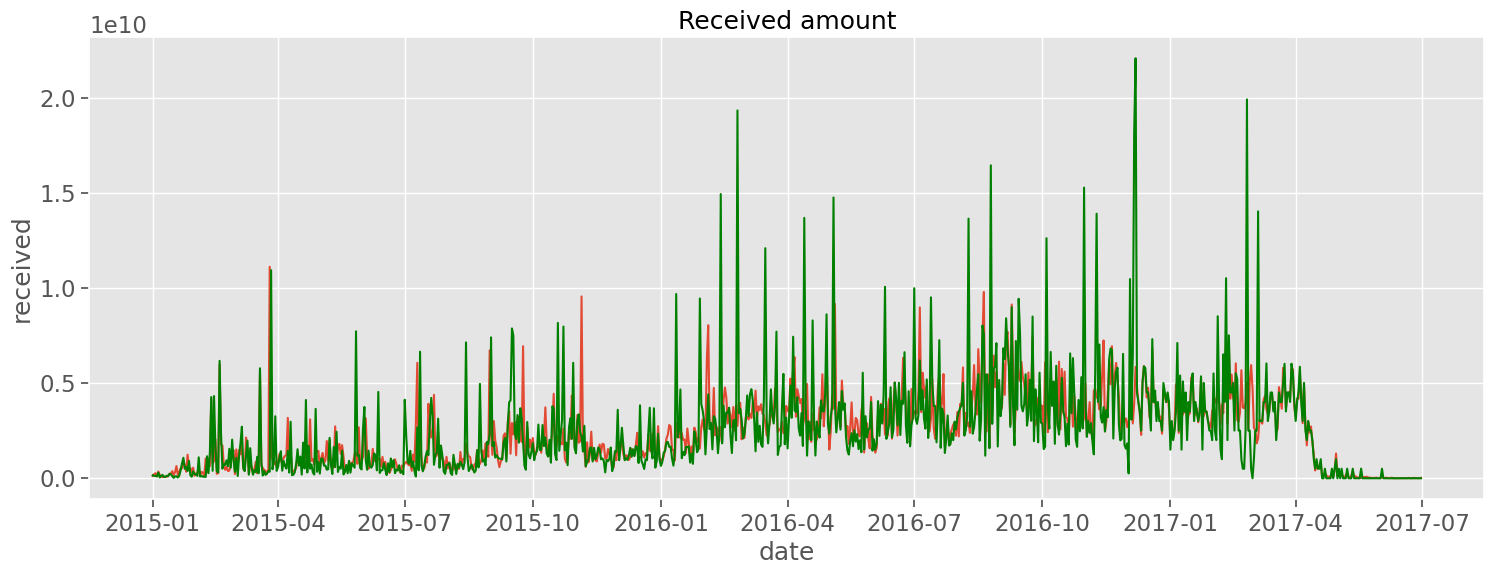

In [57]:
plt.style.use('ggplot')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 1.5})

g = plt.subplots(figsize=(18, 6))
g = sns.lineplot(x='date', y='received', data=okcoin)
sns.lineplot(x='date', y='sent', data=okcoin, color='green')
plt.title('Received amount')

In [7]:
# count anonymous actors
anons = [identity for identity in unique_identity if identity.isdigit()]
print(anons)
print('anons size :', len(anons))
not_anons = [identity for identity in unique_identity if not identity.isdigit()]
print(not_anons)
print('size :', len(not_anons))

['821', '396', '0', '641', '289', '417', '1391', '101', '469', '61400549', '70063369', '71842975', '107', '16621', '5162', '61', '18972', '1805', '1138', '898', '175', '523', '7277', '227', '348', '73832915', '72472408', '269', '35', '74304487', '69383113', '71554939', '57', '421', '1149', '1226', '154', '73963652', '16768780', '70927660', '74278522', '69697250', '871', '1070', '122', '69827719', '69984672', '700', '1567', '419', '292', '354']
anons size : 52
['HappyCoins.com', 'FortuneJack.com', 'SatoshiMines.com', 'Rollin.io', 'SatoshiDice.com', 'Loanbase.com', 'Bitstamp.net', 'Paymium.com', 'YoBit.net', 'FYBSG.com', 'Poloniex.com', 'Bitbond.com', 'ePay.info_CoinJoinMess', 'HolyTransaction.com', 'SlushPool.com', 'BTCJam.com', 'Matbea.com', 'TheRockTrading.com', 'Huobi.com', 'HaoBTC.com', 'SafeDice.com', 'CoinSpot.com.au', 'CoinMotion.com', 'Xapo.com', 'CoinGaming.io', 'OKCoin.com', 'BitZillions.com', 'SecondsTrade.com', 'BitcoinFog', '999Dice.com', 'BX.in.th', 'SimpleCoin.cz', 'BTC-e